In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_train_path = "train"

idg = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2
)

dataset_train = idg.flow_from_directory(
    dataset_train_path,
    shuffle=True,
    subset="training",
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_train_path,
    shuffle=True,
    subset="validation",
    target_size=(224, 224)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [3]:
model = models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), activation="relu", padding="same", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    layers.Dense(17, activation="softmax"),
])

d:\Program Files\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [5]:
# dataset_train = x_train & y_train
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=30)

# training and evaluating simultaneously:

Epoch 1/30


d:\Program Files\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 804ms/step - accuracy: 0.0786 - loss: 2.8230 - val_accuracy: 0.1726 - val_loss: 2.3057
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.1926 - loss: 2.3938 - val_accuracy: 0.3350 - val_loss: 1.9905
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.3321 - loss: 1.9721 - val_accuracy: 0.4315 - val_loss: 1.6846
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 588ms/step - accuracy: 0.3967 - loss: 1.7521 - val_accuracy: 0.4721 - val_loss: 1.5143
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.5316 - loss: 1.3325 - val_accuracy: 0.5025 - val_loss: 1.3854
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.6245 - loss: 1.0787 - val_accuracy: 0.5584 - val_loss: 1.2992
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.6688 - loss: 0.9118 - val_accuracy: 0.5888 - val_loss: 1.1813
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.7531 - loss: 0.7321 - val_accuracy: 0.6041

In [6]:
loss , accuracy = model.evaluate(dataset_validation)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6210 - loss: 2.0766
validation loss: 2.0651562213897705
validation accuracy: 0.6294416189193726


In [7]:
model.save("weights/17_flowers_weights_2.h5")

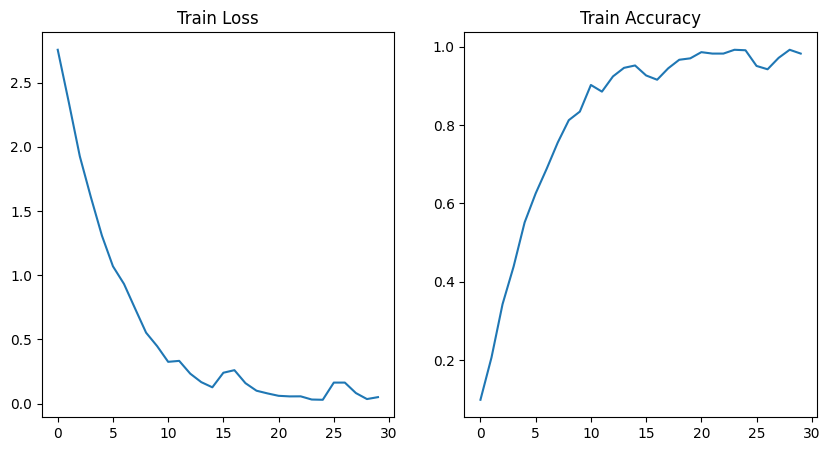

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['loss'])
ax1.set_title("Train Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Train Accuracy")
plt.show()

In [9]:
dataset_test_path = "test"

idg = ImageDataGenerator(
    rescale=1/255
)

dataset_test = idg.flow_from_directory(
    dataset_test_path,
    shuffle=False,
    target_size=(224, 224)
)

Found 340 images belonging to 17 classes.


In [10]:
loss , accuracy = model.evaluate(dataset_test)
print("test loss:" , loss)
print("test accuracy:" ,accuracy)

 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.6562 - loss: 1.7503

d:\Program Files\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 691ms/step - accuracy: 0.5595 - loss: 2.5558
test loss: 2.477367877960205
test accuracy: 0.5794117450714111


In [11]:
model = tf.keras.models.load_model('weights/17_flowers_weights_2.h5')

In [12]:
y_pred = model.predict(dataset_test)
y_predict = np.argmax(y_pred , axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step


In [13]:
y_pred

array([[9.8979723e-01, 4.5204458e-11, 6.2045264e-13, ..., 1.4550788e-07,
        4.0343599e-13, 2.5732949e-04],
       [9.9498075e-01, 7.1417111e-10, 6.3590714e-14, ..., 2.3789894e-08,
        8.1584728e-13, 1.8524595e-05],
       [9.9995685e-01, 1.3866018e-14, 9.0643809e-22, ..., 2.1926207e-12,
        3.4968207e-20, 4.4883081e-10],
       ...,
       [1.7097643e-09, 2.7163912e-07, 4.5458472e-07, ..., 5.3961521e-08,
        4.0935483e-05, 9.7805643e-01],
       [1.4336959e-05, 6.0705767e-11, 4.4510891e-15, ..., 2.5998525e-06,
        2.6115315e-10, 7.2926390e-01],
       [2.0685041e-10, 8.6166262e-11, 5.6380964e-16, ..., 2.5035049e-11,
        2.4396400e-08, 9.1544300e-01]], dtype=float32)

In [14]:
y_predict

array([ 0,  0,  0,  0,  0,  0,  0,  0, 12, 16,  0, 11,  0,  3, 11, 10, 11,
        0,  0,  0, 16,  1,  1,  1,  1,  1,  1,  1,  5,  7,  1,  7,  1, 15,
        3,  3,  1,  1,  1,  3, 15,  7,  7,  2,  7,  1, 13,  2,  3,  2,  2,
        1,  2,  1,  2,  2, 15, 15,  3, 15, 14,  5,  3,  7,  3,  3,  3,  1,
        3,  3,  3,  3,  3,  3,  3, 15,  7,  3,  3,  3,  5,  3,  0,  8,  8,
        4, 16, 16,  9,  8,  4,  4,  4,  8,  0,  8, 16,  8,  8,  0,  8, 12,
        5,  1,  5,  1,  5,  1,  3,  5, 15,  7,  1,  5, 15,  5, 15,  2,  1,
        5,  5, 14, 15, 14,  6,  6,  6,  6,  6, 16,  6,  6,  6, 16,  6,  6,
        6,  6,  6, 16, 15,  6, 16, 12,  7,  1,  7,  1,  5,  7,  1,  1,  7,
        7,  7,  2,  7,  7,  7,  7,  7, 15,  3,  7,  5,  8, 12,  8,  8,  8,
        8,  0,  8,  8,  8,  8,  8,  3, 12,  8,  8,  8,  8,  8,  8, 12,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  0,  0,  8,  9, 12,  9,  9,  9,
        9, 14,  6, 16, 12, 10,  6, 10, 10, 10, 10, 12, 10, 12,  0,  0, 10,
       10,  3, 10, 10, 10

In [15]:
dataset_validation.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16])

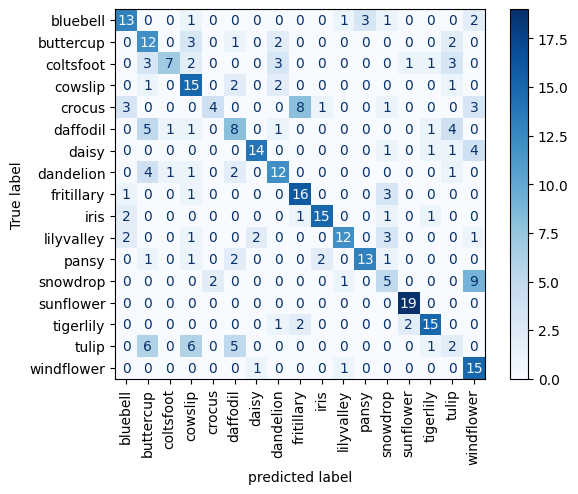

In [16]:
from sklearn import metrics

confusion_mat = metrics.confusion_matrix(dataset_test.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, 
            display_labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil',
                              'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy',
                              'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower'])

cm_display.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()